# **What are Embeddings?**

*Author : Deepak John Reji*

Video Tuitorial : https://youtu.be/mWm6JGEer14

Linked In: https://www.linkedin.com/in/deepak-john-reji/

A very basic definition of a word embedding is a real number, vector representation of a word. Typically, these days, words with similar meaning will have vector representations that are close together in the embedding space (though this has not always been the case).

When constructing a word embedding space, typically the goal is to capture some sort of relationship in that space, be it meaning, morphology, context, or some other kind of relationship.

By encoding word embeddings in a densely populated space, we can represent words numerically in a way that captures them in vectors that have tens or hundreds of dimensions instead of millions (like one-hot encoded vectors).

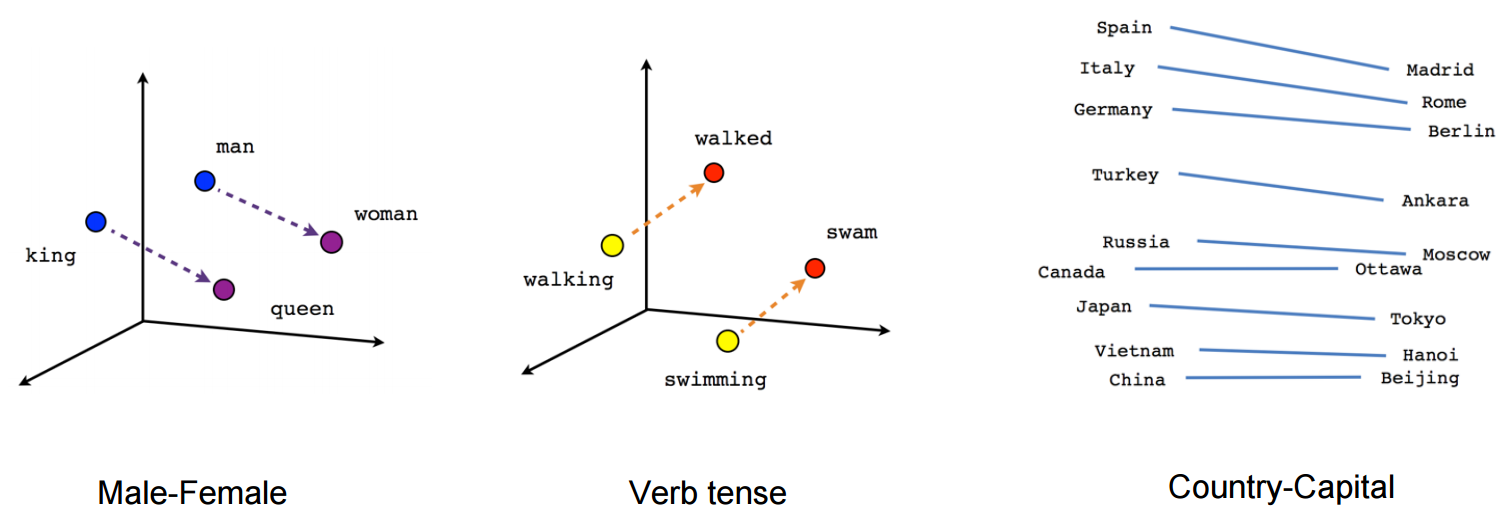


# **Visualizing Embeddings using Whatlies**

This small library offers tools to make visualisation easier of both word embeddings as well as operations on them.

In [1]:
pip install whatlies[all]

     |████████████████████████████████| 92kB 4.2MB/s 
     |████████████████████████████████| 22.3MB 129kB/s 
     |████████████████████████████████| 23.9MB 51.6MB/s 
     |████████████████████████████████| 2.5MB 31.4MB/s 
     |████████████████████████████████| 81kB 6.5MB/s 
     |████████████████████████████████| 4.3MB 28.0MB/s 
     |████████████████████████████████| 81kB 7.7MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 97.3MB 77kB/s 
     |████████████████████████████████| 12.8MB 123kB/s 
     |████████████████████████████████| 1.2MB 22.2MB/s 
     |████████████████████████████████| 901kB 31.0MB/s 
     |████████████████████████████████| 3.3MB 19.3MB/s 
     |████████████████████████████████| 460kB 43.8MB/s 
     |████████████████████████████████| 1.2MB 35.6MB/s 
     |████████████████████████████████| 9.1MB 30.6MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 624kB 45.1MB/s 
  

In [2]:
from whatlies import EmbeddingSet
from whatlies.language import SentenceTFMLanguage

lang = SentenceTFMLanguage('paraphrase-distilroberta-base-v1')

words = ["Iranian", "The evil iranian was eating dinner at the restaurant", "The kind iranian was eating dinner at the restaurant", "herself", 
         "she is unsure of herself", "she is confident of herself", "she is boxes of herself"]

emb = EmbeddingSet(*[lang[w] for w in words])
emb.plot_interactive(x_axis=emb["Iranian"], y_axis=emb["herself"])

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


alt.LayerChart(...)

In [3]:
lang = SentenceTFMLanguage('paraphrase-distilroberta-base-v1')

words = ["I heard another passenger on our plane in Saudi Arabian", "He is probably going to hijack the plane and try to kill us", 
         "He is just travelling back home after visiting his family", "The mathematician works at a university", "He is asian and nerdy", "She is black and outgoing"]

emb = EmbeddingSet(*[lang[w] for w in words])
emb.plot_interactive(x_axis=emb["I heard another passenger on our plane in Saudi Arabian"], y_axis=emb["The mathematician works at a university"])

alt.LayerChart(...)

# **Classification Model**

In [17]:
import pandas as pd
df = pd.read_excel('train_tweets.xlsx')

In [18]:
df.columns

Index(['tweet', 'label'], dtype='object')

In [19]:
import numpy as np
from whatlies.language import BytePairLanguage
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ("embed", BytePairLanguage("en")),
    ("model", LogisticRegression())
])

X = list(df['tweet'])

y = np.array(list(df['label']))

pipe.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(steps=[('embed', BytePairLanguage(lang='en')),
                ('model', LogisticRegression())])